## Loading data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-11-06 18:46:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  21.9MB/s    in 3.0s    

2024-11-06 18:46:06 (21.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Reading the Data into arrays

In [3]:
from PIL import Image
import numpy as np


# Define the number of examples you want to load for training
NUMBER_OF_EXAMPLES = 100

# Initialize lists to store data and labels
x_train = []
y_train = []

cats_dir = os.path.join(train_dir + "/cats")
dogs_dir = os.path.join(train_dir + "/dogs")
i = 0
while i < NUMBER_OF_EXAMPLES:
  if i % 2 == 0:
    im = Image.open(os.path.join(cats_dir, os.listdir(cats_dir)[i])).convert("RGB")
    im_resized = im.resize((150, 150))
    x_train.append(np.array(im_resized))
    y_train.append(1)
  else:
    im = Image.open(os.path.join(dogs_dir, os.listdir(dogs_dir)[i])).convert("RGB")
    im_resized = im.resize((150, 150))
    x_train.append(np.array(im_resized))
    y_train.append(0)
  i += 1

x_train = np.array(x_train)
y_train = np.array(y_train)

## Beginning to define the model (this is where you come in, I loaded the pretrained model for you)

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    classes=2,
    weights='imagenet'
)

addModel = tf.keras.Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

addModel.build(input_shape=(None, 150, 150, 3))
addModel.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 24,584,193 (93.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
addModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 10
history = addModel.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 97s 15s/step - accuracy: 0.4664 - loss: 1.2141 - val_accuracy: 0.5000 - val_loss: 7.4987
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.8852 - loss: 0.5717 - val_accuracy: 0.7000 - val_loss: 1.4545
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9578 - loss: 0.3018 - val_accuracy: 0.5500 - val_loss: 119.5007
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9656 - loss: 0.1125 - val_accuracy: 0.6500 - val_loss: 448.6227
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9820 - loss: 0.0946 - val_accuracy: 0.7000 - val_loss: 122.1500
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9719 - loss: 0.1056 - val_accuracy: 0.5000 - val_loss: 6388.3701
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9875 - loss: 0.0436 - val_accuracy: 0.5000 - val_loss: 6078.8701
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9797 - loss: 0.3602 - val_accuracy: 0.5000

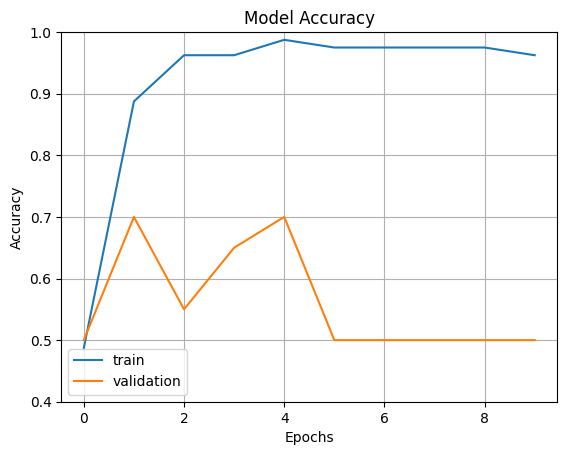

In [6]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
